Import Packages

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Data

In [3]:
parent_dir = '../../data/philosopher/'

N = 10_000
M = 50
ITERATIONS = 10
# Load Scala benchmark data
scala_idle_raw_data = pd.read_csv(f'{parent_dir}6/philosopher_akka_actor_benchmark_idle_power.csv')
scala_bench_raw_data = pd.read_csv(f'{parent_dir}6/philosopher_akka_actor_benchmark_power_metrics.csv')

# Load Erlang benchmark data
erlang_idle_raw_data = pd.read_csv(f'{parent_dir}6/philosopher_benchmark_idle_power.csv')
erlang_bench_raw_data = pd.read_csv(f'{parent_dir}6/philosopher_benchmark_power_metrics.csv')

# Replace empty or missing values with "N/A" in non-numeric columns
scala_idle_raw_data.fillna("N/A", inplace=True)
scala_bench_raw_data.fillna("N/A", inplace=True)
erlang_idle_raw_data.fillna("N/A", inplace=True)
erlang_bench_raw_data.fillna("N/A", inplace=True)

Preview the Data

In [4]:
print("Scala Idle Raw Data:")
print(scala_idle_raw_data.shape)
scala_idle_raw_data.head()

Scala Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Mon Mar 31 08:40:50 2025 +0200) (509.64ms ela...,0.1750,0.0000,0.374,0.53,0.03,2.23,54.84 C,Nominal
1,(Mon Mar 31 08:40:51 2025 +0200) (508.55ms ela...,1.1800,0.0277,0.378,1.39,0.26,22.10,55.32 C,Nominal
2,(Mon Mar 31 08:40:51 2025 +0200) (507.97ms ela...,0.0782,0.0000,0.266,0.12,0.03,2.43,55.32 C,Nominal
3,(Mon Mar 31 08:40:52 2025 +0200) (508.42ms ela...,0.0654,0.0000,0.255,0.12,0.03,2.53,55.02 C,Nominal
4,(Mon Mar 31 08:40:52 2025 +0200) (509.73ms ela...,0.0545,0.0000,0.254,0.09,0.03,2.41,55.02 C,Nominal


In [5]:
print("Scala Benchmark Raw Data:")
print(scala_bench_raw_data.shape)
scala_bench_raw_data.head()

Scala Benchmark Raw Data:
(71, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Mon Mar 31 08:41:01 2025 +0200) (107.39ms ela...,35.8,0.0,1.62,37.22,3.95,99.09,53.21 C,Nominal
1,(Mon Mar 31 08:41:02 2025 +0200) (105.79ms ela...,34.3,0.0,1.27,35.09,3.96,99.24,53.21 C,Nominal
2,(Mon Mar 31 08:41:02 2025 +0200) (106.60ms ela...,36.6,0.0,1.89,37.88,3.93,98.89,53.21 C,Nominal
3,(Mon Mar 31 08:41:02 2025 +0200) (104.82ms ela...,38.1,0.0,1.96,39.36,4.00,99.93,53.21 C,Nominal
4,(Mon Mar 31 08:41:02 2025 +0200) (105.10ms ela...,37.5,0.0,2.06,38.71,3.99,99.89,53.21 C,Nominal


In [6]:
print("Erlang Idle Raw Data:")
print(erlang_idle_raw_data.shape)
erlang_idle_raw_data.head()

Erlang Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Tue Apr 1 09:16:25 2025 +0200) (511.43ms elap...,0.1520,0.0000,0.266,0.21,0.05,3.85,51.26 C,Nominal
1,(Tue Apr 1 09:16:26 2025 +0200) (507.44ms elap...,1.9400,0.0326,0.470,2.20,0.31,20.99,51.29 C,Nominal
2,(Tue Apr 1 09:16:26 2025 +0200) (508.13ms elap...,1.1600,0.0000,0.308,1.27,0.19,14.88,51.29 C,Nominal
3,(Tue Apr 1 09:16:27 2025 +0200) (507.88ms elap...,0.1130,0.0000,0.267,0.17,0.06,4.27,51.30 C,Nominal
4,(Tue Apr 1 09:16:27 2025 +0200) (508.32ms elap...,0.0466,0.0000,0.261,0.08,0.03,2.13,51.30 C,Nominal


In [7]:
print("Erlang Benchmark Raw Data:")
print(erlang_bench_raw_data.shape)
erlang_bench_raw_data.head()

Erlang Benchmark Raw Data:
(247, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Tue Apr 1 09:16:36 2025 +0200) (109.04ms elap...,24.3,0.0,0.844,25.03,3.31,95.13,51.20 C,Nominal
1,(Tue Apr 1 09:16:36 2025 +0200) (105.50ms elap...,24.0,0.0,0.814,24.62,3.30,95.78,51.20 C,Nominal
2,(Tue Apr 1 09:16:36 2025 +0200) (105.67ms elap...,23.2,0.0,0.785,24.06,3.21,95.54,51.20 C,Nominal
3,(Tue Apr 1 09:16:36 2025 +0200) (105.47ms elap...,23.2,0.0,0.781,23.87,3.17,95.72,51.20 C,Nominal
4,(Tue Apr 1 09:16:37 2025 +0200) (105.62ms elap...,22.7,0.0,0.796,23.54,3.15,98.18,51.20 C,Nominal


Clean the Data

In [8]:
def clean_data(df):
    df_copy = df.copy() 
    
    # Convert Timestamp to datetime format (extract date-time pattern)
    df_copy['Timestamp'] = pd.to_datetime(
        df['Timestamp'].str.extract(r'(\w{3} \w{3} \d{1,2} \d{2}:\d{2}:\d{2} \d{4})')[0], 
        errors='coerce'
    )

    # Extract elapsed time in milliseconds
    df_copy['Time Elapsed (ms)'] = pd.to_numeric(
        df['Timestamp'].str.extract(r'\((\d+\.\d+)ms elapsed\)')[0], 
        errors='coerce'
    )
    
    # Extract numeric temperature values
    df_copy['CPU Temp(C)'] = df['CPU Temp(C)'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

    # Fill N/A values with 0 for numerical columns
    df_copy = df_copy.fillna(0)
    
    return df_copy

In [9]:
scala_idle_data = clean_data(scala_idle_raw_data)
scala_bench_data = clean_data(scala_bench_raw_data)
erlang_idle_data = clean_data(erlang_idle_raw_data)
erlang_bench_data = clean_data(erlang_bench_raw_data)

Verify Cleaned Data

In [10]:
print("Scala Idle Clean Data:")
print(scala_idle_data.shape)
scala_idle_data.head()

Scala Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-31 08:40:50,0.1750,0.0000,0.374,0.53,0.03,2.23,54.84,Nominal,509.64
1,2025-03-31 08:40:51,1.1800,0.0277,0.378,1.39,0.26,22.10,55.32,Nominal,508.55
2,2025-03-31 08:40:51,0.0782,0.0000,0.266,0.12,0.03,2.43,55.32,Nominal,507.97
3,2025-03-31 08:40:52,0.0654,0.0000,0.255,0.12,0.03,2.53,55.02,Nominal,508.42
4,2025-03-31 08:40:52,0.0545,0.0000,0.254,0.09,0.03,2.41,55.02,Nominal,509.73


In [11]:
print("Scala Benchmark Clean Data:")
print(scala_bench_data.shape)
scala_bench_data.head()


Scala Benchmark Clean Data:
(71, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-31 08:41:01,35.8,0.0,1.62,37.22,3.95,99.09,53.21,Nominal,107.39
1,2025-03-31 08:41:02,34.3,0.0,1.27,35.09,3.96,99.24,53.21,Nominal,105.79
2,2025-03-31 08:41:02,36.6,0.0,1.89,37.88,3.93,98.89,53.21,Nominal,106.60
3,2025-03-31 08:41:02,38.1,0.0,1.96,39.36,4.00,99.93,53.21,Nominal,104.82
4,2025-03-31 08:41:02,37.5,0.0,2.06,38.71,3.99,99.89,53.21,Nominal,105.10


In [12]:
print("Erlang Idle Clean Data:")
print(erlang_idle_data.shape)
erlang_idle_data.head()


Erlang Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-01 09:16:25,0.1520,0.0000,0.266,0.21,0.05,3.85,51.26,Nominal,511.43
1,2025-04-01 09:16:26,1.9400,0.0326,0.470,2.20,0.31,20.99,51.29,Nominal,507.44
2,2025-04-01 09:16:26,1.1600,0.0000,0.308,1.27,0.19,14.88,51.29,Nominal,508.13
3,2025-04-01 09:16:27,0.1130,0.0000,0.267,0.17,0.06,4.27,51.30,Nominal,507.88
4,2025-04-01 09:16:27,0.0466,0.0000,0.261,0.08,0.03,2.13,51.30,Nominal,508.32


In [13]:
print("Erlang Benchmark Clean Data:")
print(erlang_bench_data.shape)
erlang_bench_data.head()

Erlang Benchmark Clean Data:
(247, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-01 09:16:36,24.3,0.0,0.844,25.03,3.31,95.13,51.2,Nominal,109.04
1,2025-04-01 09:16:36,24.0,0.0,0.814,24.62,3.30,95.78,51.2,Nominal,105.50
2,2025-04-01 09:16:36,23.2,0.0,0.785,24.06,3.21,95.54,51.2,Nominal,105.67
3,2025-04-01 09:16:36,23.2,0.0,0.781,23.87,3.17,95.72,51.2,Nominal,105.47
4,2025-04-01 09:16:37,22.7,0.0,0.796,23.54,3.15,98.18,51.2,Nominal,105.62


Visualize the Data

In [14]:
def plot_graphs(idle_df, bench_df, title_prefix):
    """
    Creates side-by-side subplots for each metric, plotting idle (left) and benchmark (right),
    using elapsed time on the x-axis.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    idle_df = idle_df.copy()
    bench_df = bench_df.copy()
    

    # Compute elapsed time starting from t=0
    idle_df["Elapsed Time (s)"] = (idle_df["Time Elapsed (ms)"].cumsum() - idle_df["Time Elapsed (ms)"].iloc[0]) / 1000
    bench_df["Elapsed Time (s)"] = (bench_df["Time Elapsed (ms)"].cumsum() - bench_df["Time Elapsed (ms)"].iloc[0]) / 1000

    for column in columns_to_plot:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Plot Idle data on the first subplot
        sns.lineplot(data=idle_df, x="Elapsed Time (s)", y=column, label="Idle", color='blue', linestyle='--', ax=axes[0])
        axes[0].set_title(f"Idle - {column}", fontsize=12)
        axes[0].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[0].set_ylabel(column, fontsize=10)
        axes[0].legend()
        axes[0].grid(True)

        # Plot Benchmark data on the second subplot
        sns.lineplot(data=bench_df, x="Elapsed Time (s)", y=column, label="Benchmark", color='red', ax=axes[1])
        axes[1].set_title(f"Benchmark - {column}", fontsize=12)
        axes[1].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[1].set_ylabel(column, fontsize=10)
        axes[1].legend()
        axes[1].grid(True)

        # Main figure title
        fig.suptitle(f"{title_prefix} - {column}", fontsize=14)
        
        # Adjust layout to avoid overlap
        plt.tight_layout(rect=[0, 0, 1, 0.95]) 
        plt.show()


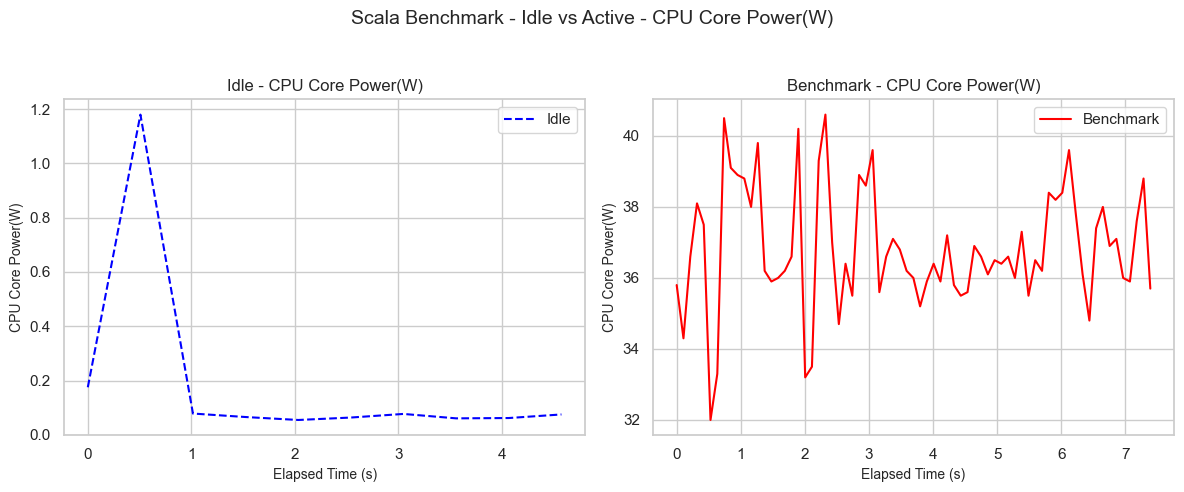

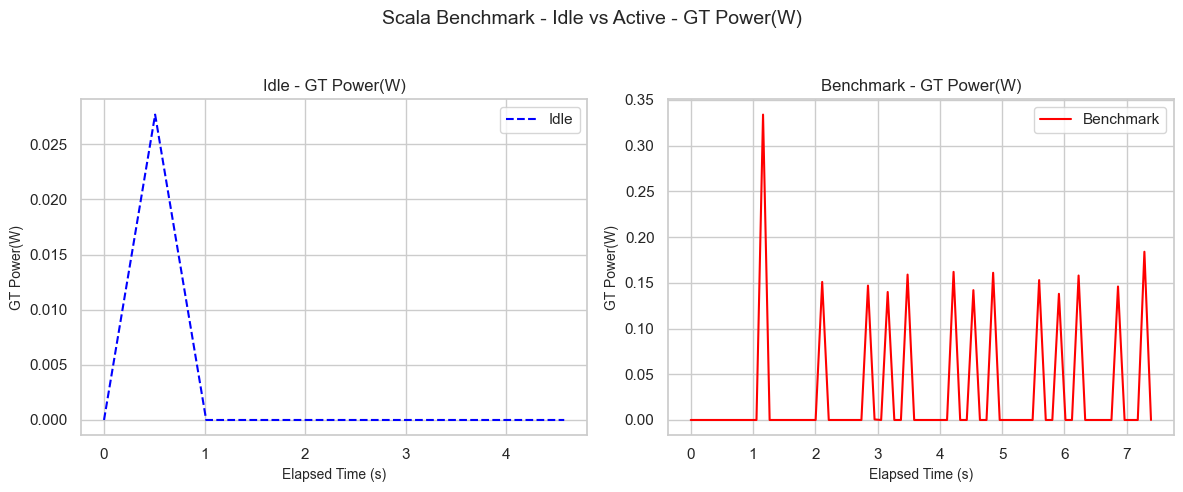

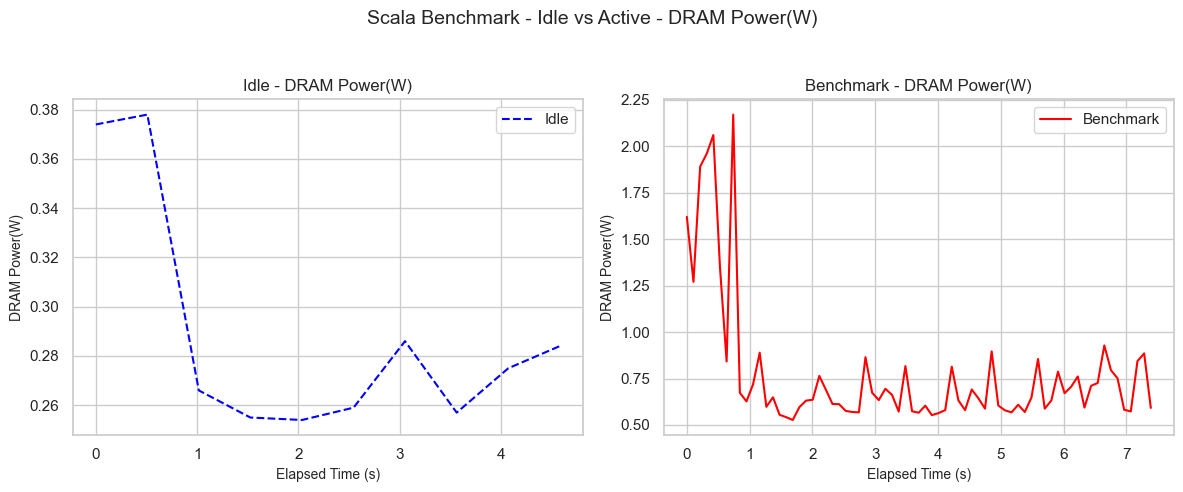

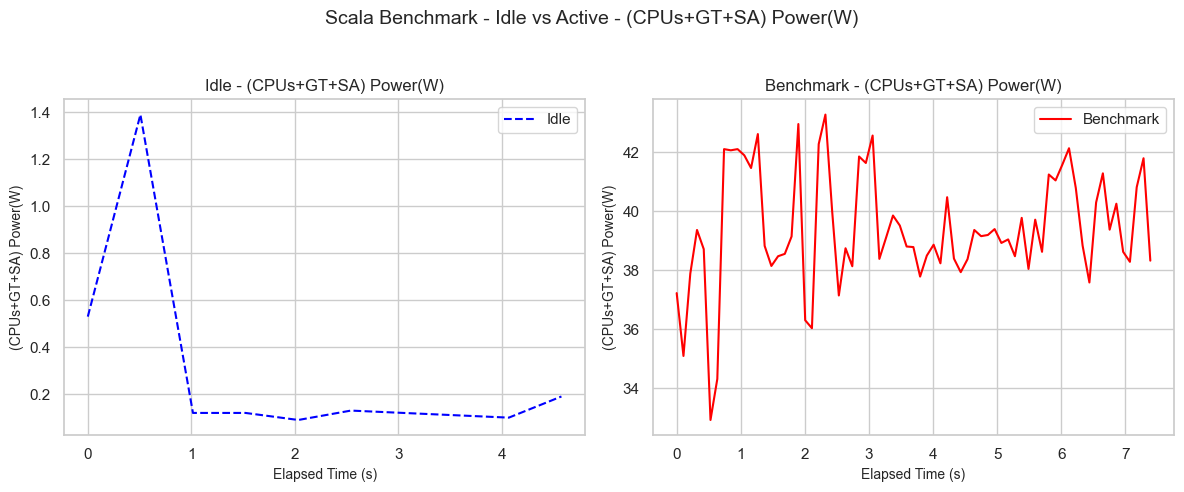

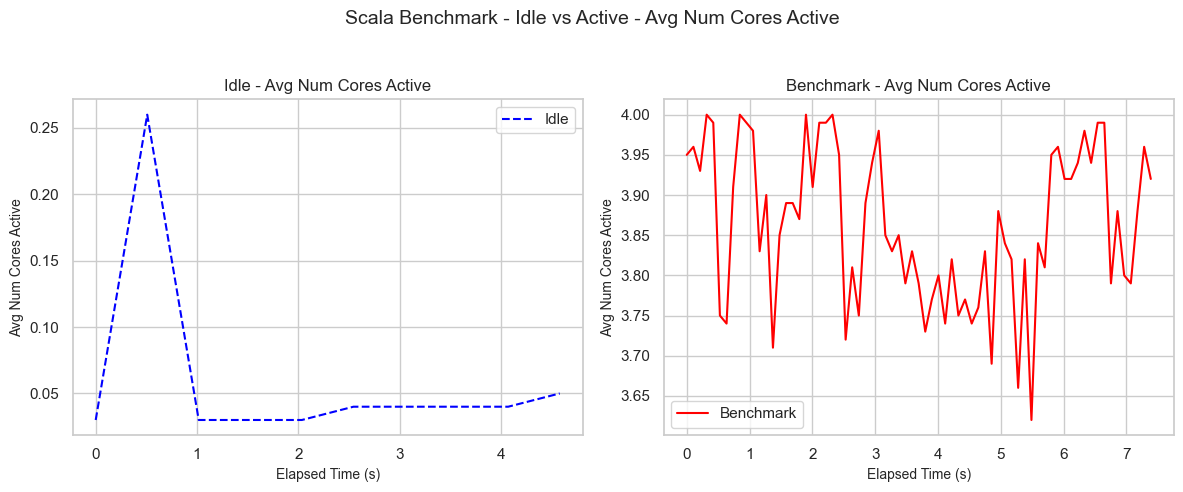

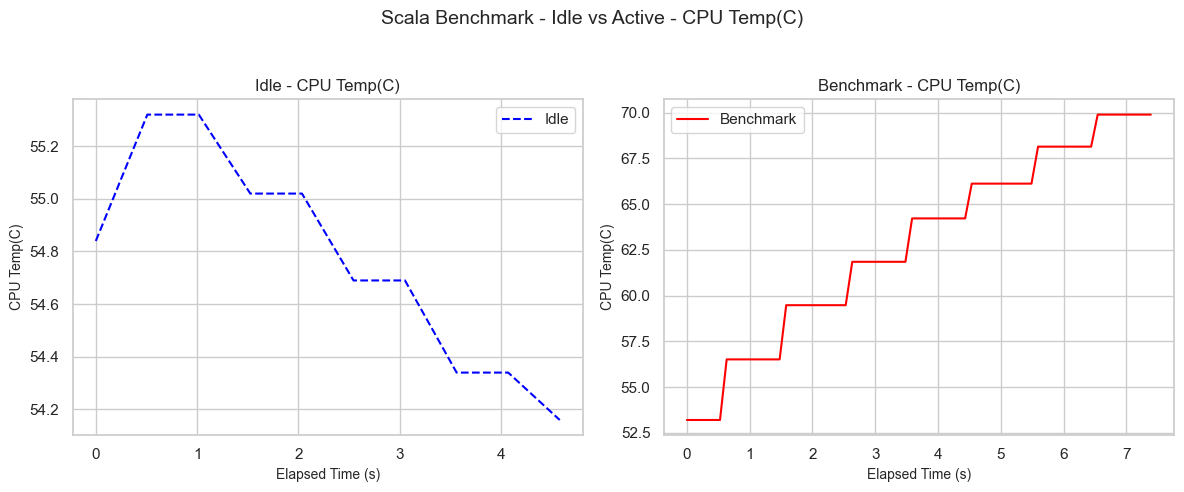

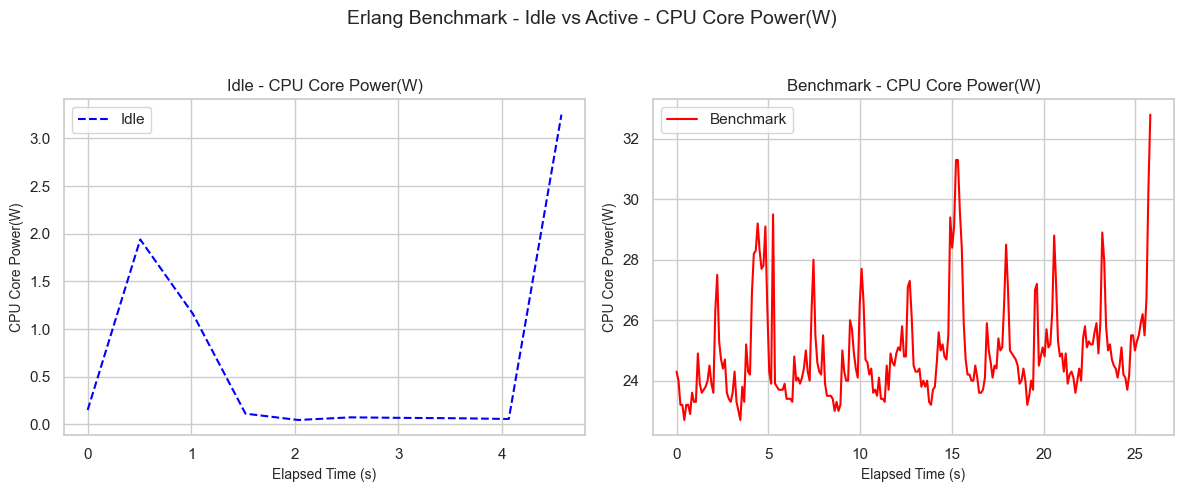

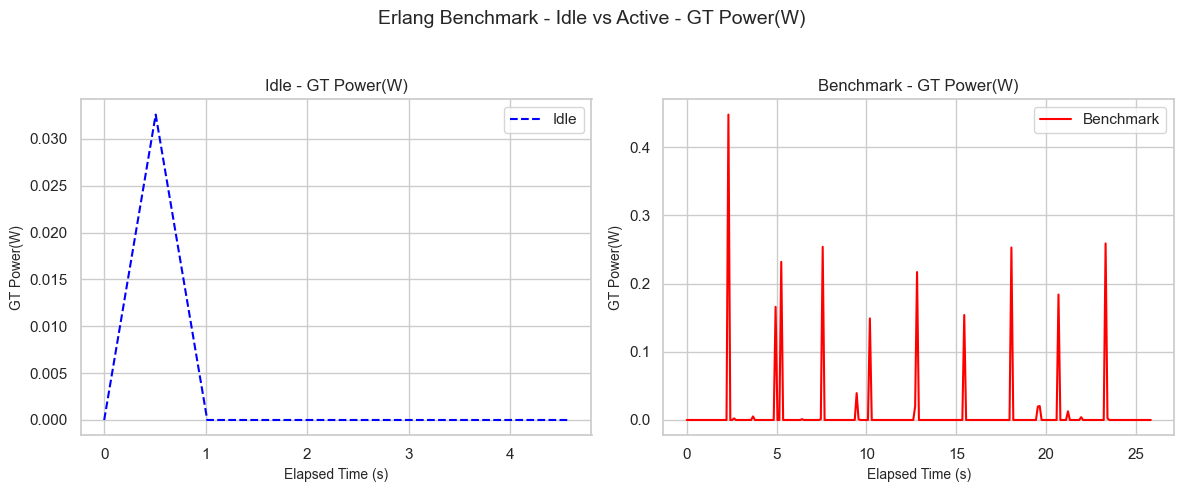

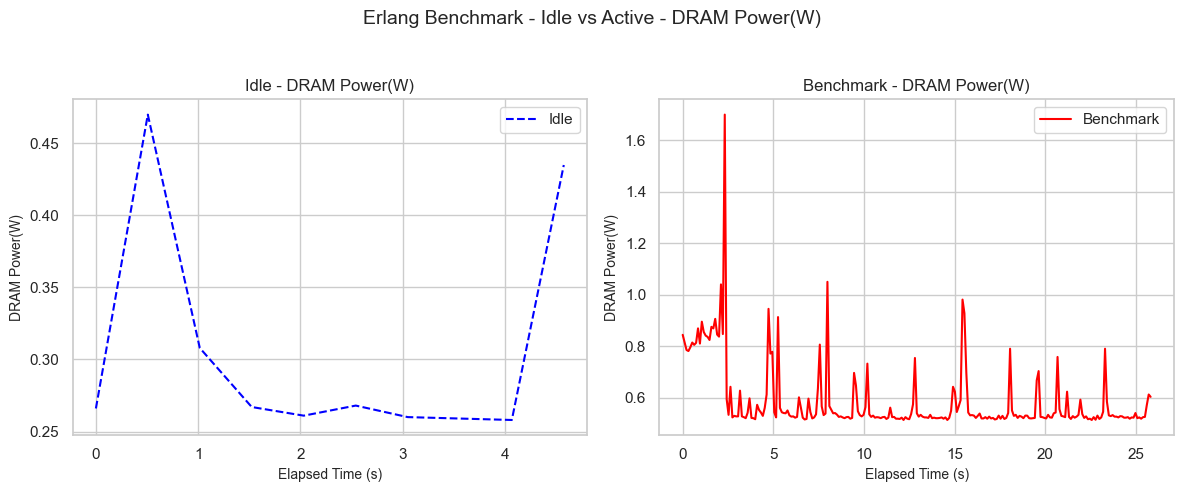

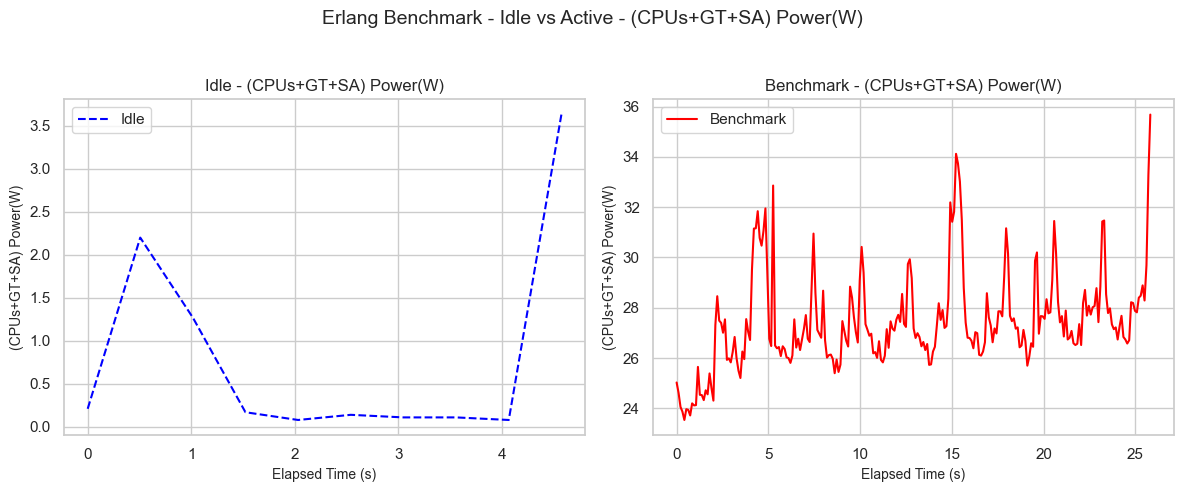

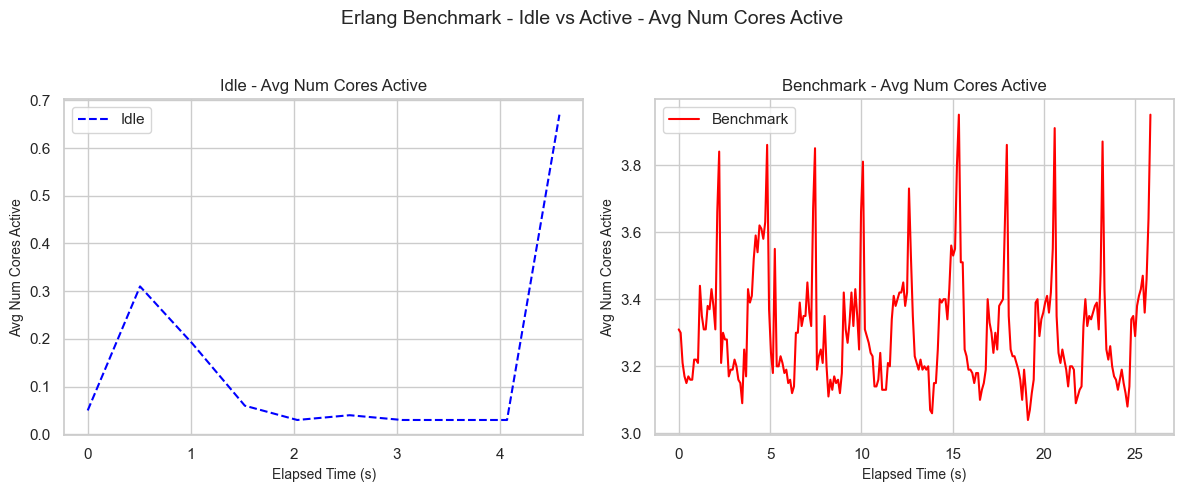

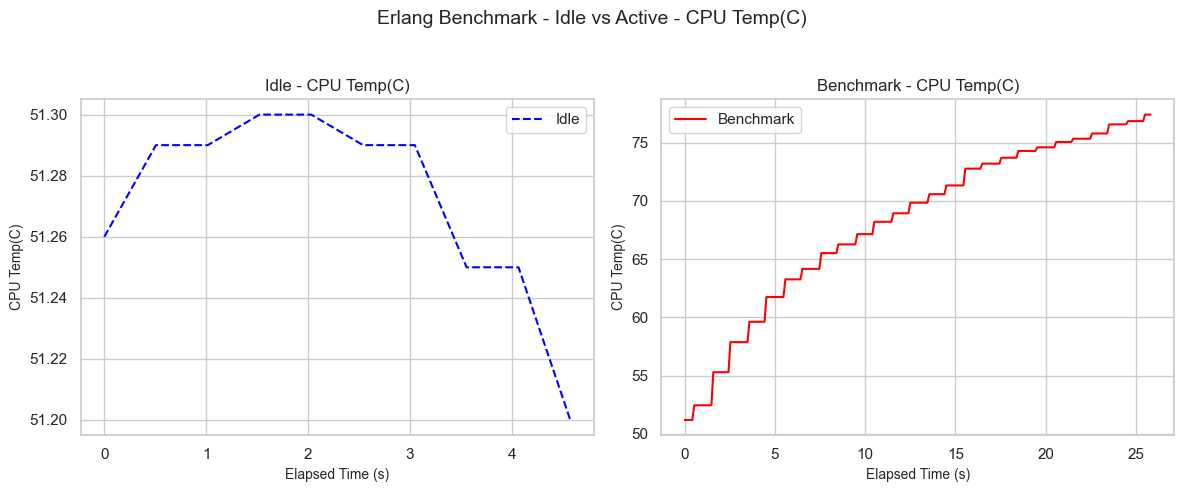

In [15]:
plot_graphs(scala_idle_data, scala_bench_data, "Scala Benchmark - Idle vs Active")
plot_graphs(erlang_idle_data, erlang_bench_data, "Erlang Benchmark - Idle vs Active")

In [16]:
def plot_erlang_vs_scala(erlang_df, scala_df, idle_erlang_df, idle_scala_df, title_prefix):
    """
    Plots Erlang and Scala benchmark data with elapsed time starting at t=0,
    after subtracting corresponding idle values.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    erlang_df = erlang_df.copy()
    scala_df = scala_df.copy()

    # Normalize elapsed time to start from t=0
    erlang_df["Elapsed Time (s)"] = (erlang_df["Time Elapsed (ms)"].cumsum() - erlang_df["Time Elapsed (ms)"].iloc[0]) / 1000
    scala_df["Elapsed Time (s)"] = (scala_df["Time Elapsed (ms)"].cumsum() - scala_df["Time Elapsed (ms)"].iloc[0]) / 1000


    for column in columns_to_plot:
        fig, ax = plt.subplots(figsize=(10, 5))

        # Subtract idle values
        erlang_df["Adjusted " + column] = np.maximum(0, erlang_df[column] - idle_erlang_df[column].mean())
        scala_df["Adjusted " + column] = np.maximum(0, scala_df[column] - idle_scala_df[column].mean())

        # Plot Erlang benchmark
        sns.lineplot(data=erlang_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Erlang", color='blue', ax=ax)

        # Plot Scala benchmark
        sns.lineplot(data=scala_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Scala", color='red', ax=ax)

        # Main figure title
        ax.set_title(f"{title_prefix} - {column}", fontsize=14)
        ax.set_xlabel("Elapsed Time (s)", fontsize=12)
        ax.set_ylabel(column, fontsize=12)
        ax.legend()
        ax.grid(True)

        plt.tight_layout()
        plt.show()


In [17]:
def format_number_str(num):
    """Formats large numbers into shortened notation (e.g., 1B, 100M, 10M)."""
    if num >= 1_000_000_000:
        return f"{num // 1_000_000_000}B"
    elif num >= 1_000_000:
        return f"{num // 1_000_000}M"
    elif num >= 1_000:
        return f"{num // 1_000}K"
    return str(num)

n = format_number_str(N)
m = format_number_str(M)
title_config_prefix = f"({n} Philosophers, {m} Eating Rounds, {ITERATIONS} Iterations)"

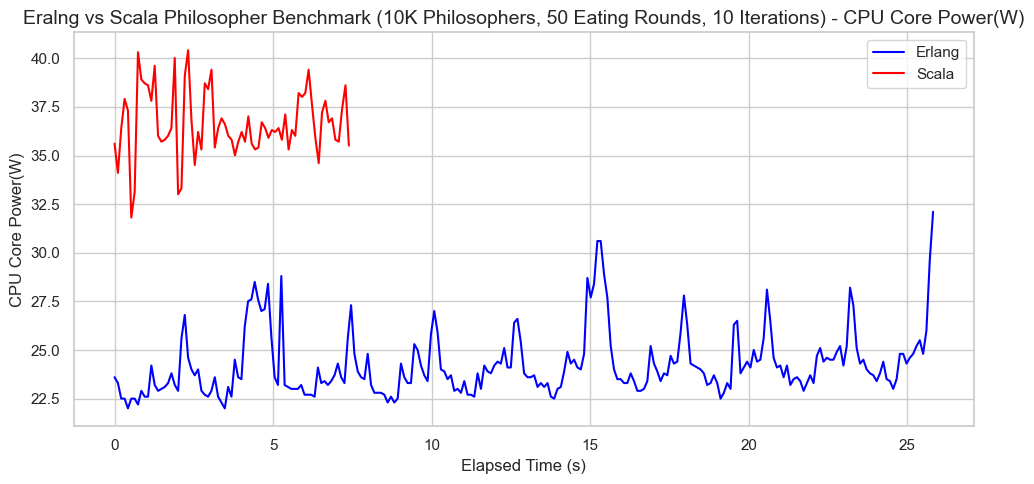

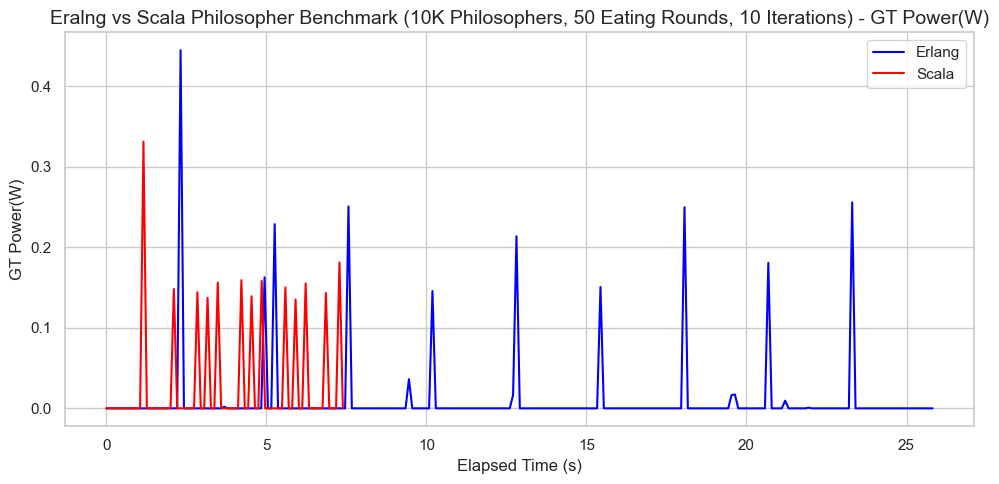

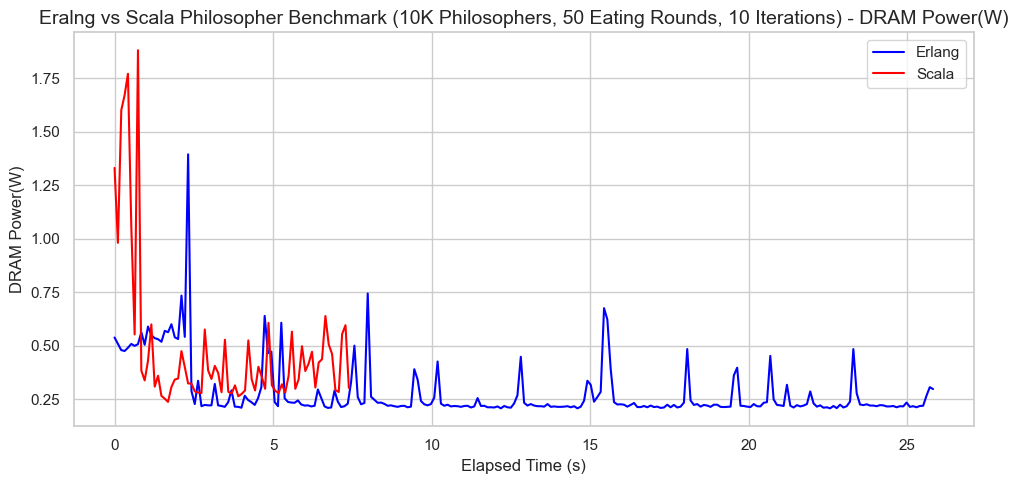

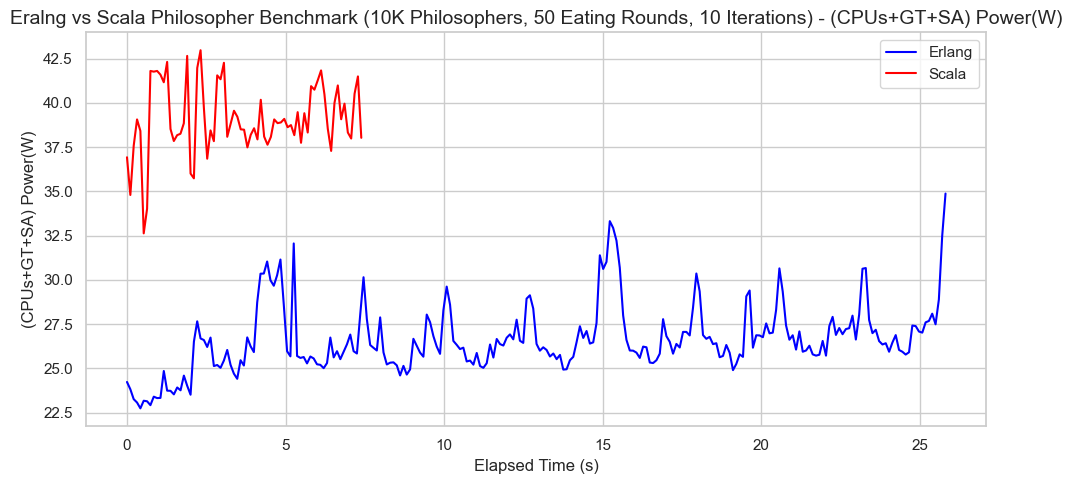

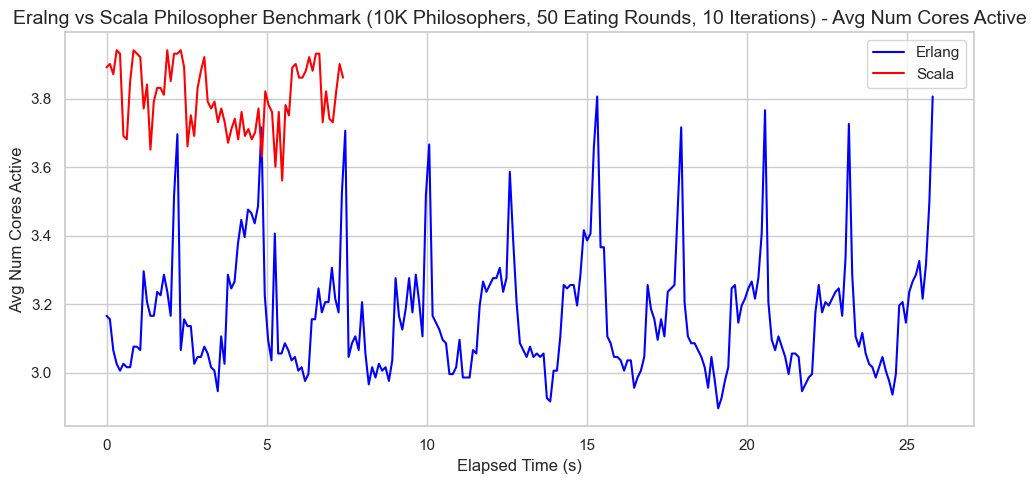

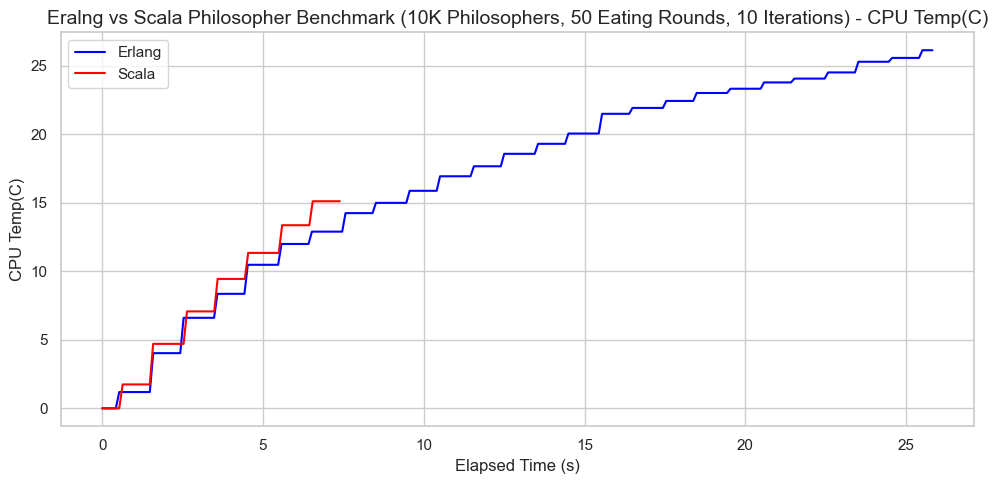

In [18]:
plot_erlang_vs_scala(erlang_bench_data, scala_bench_data, erlang_idle_data, scala_idle_data, f"Eralng vs Scala Philosopher Benchmark {title_config_prefix}")


Compute Average Metrics

In [19]:
metrics_columns = ["CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", "(CPUs+GT+SA) Power(W)","CPU Temp(C)", "Avg Num Cores Active"]

In [20]:
# Compute mean idle values for each metric
scala_idle_means = scala_idle_data[metrics_columns].mean()
erlang_idle_means = erlang_idle_data[metrics_columns].mean()

# Subtract the mean idle values from each row in the benchmark data
scala_net_avgs = (scala_bench_data[metrics_columns] - scala_idle_means).mean()
erlang_net_avgs = (erlang_bench_data[metrics_columns] - erlang_idle_means).mean()

print("Net Average Metrics Comparison:\n")
print("Scala Benchmark:")
print(scala_net_avgs, "\n")
print("Erlang Benchmark:")
print(erlang_net_avgs)

Net Average Metrics Comparison:

Scala Benchmark:
CPU Core Power(W)        36.630668
GT Power(W)               0.027872
DRAM Power(W)             0.485299
(CPUs+GT+SA) Power(W)    39.097183
CPU Temp(C)               8.054732
Avg Num Cores Active      3.804521
dtype: float64 

Erlang Benchmark:
CPU Core Power(W)        24.249060
GT Power(W)               0.006642
DRAM Power(W)             0.281739
(CPUs+GT+SA) Power(W)    26.644899
CPU Temp(C)              16.930308
Avg Num Cores Active      3.167538
dtype: float64


Compute Total Energy Consumption

In [21]:
# Calculate total elapsed time
scala_total_time = scala_bench_data["Time Elapsed (ms)"].sum() / 1000
erlang_total_time = erlang_bench_data["Time Elapsed (ms)"].sum() / 1000

# Calculate total elapsed time using timestamps (convert to seconds)
# scala_total_time = (scala_bench_data["Timestamp"].iloc[-1] - scala_bench_data["Timestamp"].iloc[0]).total_seconds()
# erlang_total_time = (erlang_bench_data["Timestamp"].iloc[-1] - erlang_bench_data["Timestamp"].iloc[0]).total_seconds()

# Compute total energy consumption
scala_total_energy = scala_net_avgs["(CPUs+GT+SA) Power(W)"] * scala_total_time
erlang_total_energy = erlang_net_avgs["(CPUs+GT+SA) Power(W)"] * erlang_total_time

# Create a DataFrame for the new row
new_row = pd.DataFrame([{
    "Iterations": ITERATIONS,
    "N": N,
    "M": M,
    "Erlang Energy Consumption(J)": erlang_total_energy,
    "Scala Energy Consumption(J)": scala_total_energy
}])

# Define CSV file path
csv_filename = os.path.join(parent_dir, "aggregate_energy_results.csv")

# Check if the file exists
if os.path.exists(csv_filename):
    # Load existing data
    existing_data = pd.read_csv(csv_filename)
    
    # Check if the row with the same (Number of Messages, Iterations) already exists
    duplicate_row = existing_data[
        (existing_data["N"] == N) & 
        (existing_data["M"] == M) &
        (existing_data["Iterations"] == ITERATIONS)
    ]
    
    if not duplicate_row.empty:
        print("Skipping duplicate entry for N =", N, "M =", M, "and Iterations =", ITERATIONS)
    else:
        # Append new row
        new_row.to_csv(csv_filename, mode='a', header=False, index=False)
        print("Results appended to", csv_filename)
else:
    # Save with header if file does not exist
    new_row.to_csv(csv_filename, mode='w', header=True, index=False)
    print("File created and results saved to", csv_filename)

# Print the computed values
print("\nTotal Energy Consumption Comparison:")
print("Scala Benchmark:", scala_total_energy,"Joules")
print("Erlang Benchmark:", erlang_total_energy,"Joules")


Results appended to ../../data/philosopher/aggregate_energy_results.csv

Total Energy Consumption Comparison:
Scala Benchmark: 293.134649028169 Joules
Erlang Benchmark: 690.8108335032388 Joules
